Telecom which is a phone company have approached me to build a pipeline to predict the number of their customers who will churn or stop using their service in the coming future. As a data scientist, it is my duty to build a precise and effective model for my client to solve their business problem by predicting the churn ratio, so that they can improve their business.

# IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np

In [6]:
import sklearn.preprocessing

In [7]:
import sklearn.model_selection
import sklearn.tree
import sklearn.svm
import sklearn.neighbors
import sklearn.linear_model
import sklearn.model_selection
import sklearn.decomposition

# IMPORTING VISUALIZATION LIBRARIES 

In [8]:
import seaborn
import seaborn as sns
import matplotlib.figure
sns.set(color_codes = True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure 

# LOADING THE DATASET

In [9]:
df = pd.read_csv("../../datasets/churn.csv")
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


I have loaded the dataset and printed top 15 from the head of the dataset.

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Using the baove code I have printed a series with the data type of each coloumn. 

# Splitting Datasets into train and test

In [9]:
df_train,df_test = sklearn.model_selection.train_test_split(df)

print("df_train size : ", df_train.shape) #size of train set
print("df_test size : ", df_test.shape) #size of test set

df_train size :  (5282, 21)
df_test size :  (1761, 21)


# CHECKING FOR NULL VALUES

In [10]:
df_train.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2582,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2881,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4612,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1692,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6382,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Here we have checked whether there is Null values by determining if there is "True" value among the data.

In [11]:
df_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From both the code above, we can conclude that since there is no "true" value in the former table and no "1" in the latter, there are no NULL values in the dataset.

# Visualization of dataset

## VIOLIN PLOT

<AxesSubplot:xlabel='customerID', ylabel='tenure'>

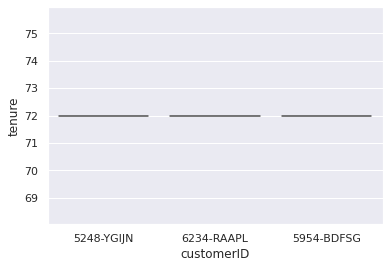

In [12]:
sns.violinplot(
    x='customerID',
    y='tenure',
    data=df.nlargest(3, 'tenure')
)

Here I have used a violine plot to compare which customers have highest tenure and from the grpah it can be seen that three cuustomers with ID '5248-YGIJN','6234-RAAPL','5954-BDFSG'have the highest tenure with value 72

## COUNTPLOT

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

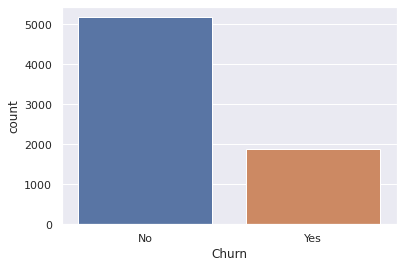

In [12]:
sns.countplot(df['Churn'])

It can be seen that the number of customers who will not churn is more than that of customers who will churn

# DISPLOT

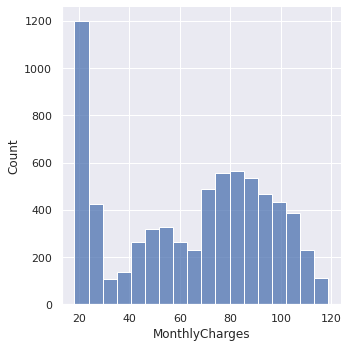

In [33]:
sns.displot(df["MonthlyCharges"])

IT can be seen that approximately 20 is the most common monthly charges compared to others.

Now lets check which customer have the highest monthly charges.

In [34]:
df["customerID"][df["MonthlyCharges"]== max(df["MonthlyCharges"])]

4586    7569-NMZYQ
Name: customerID, dtype: object

customer with ID 7569-NMZYQ has the highest monthly charges with 4586

# Data Preprocessing and Feature Engineering

## Seperating target and feature vector

In [13]:
x_train = df_train.drop(["Churn"],axis = 1)
y_train = df_train["Churn"]

x_test = df_test.drop(["Churn"], axis = 1)
y_test = df_test["Churn"]

print("x_test size : ",x_test.shape) 
print("x_train size : ",x_train.shape)
print("y_train size : ",y_train.shape)
print("y_test size : ",y_test.shape)

x_test size :  (1761, 20)
x_train size :  (5282, 20)
y_train size :  (5282,)
y_test size :  (1761,)


## Encoding dataset

In [14]:
enc = sklearn.preprocessing.OneHotEncoder(handle_unknown = "ignore")
enc.fit(x_train)

x_train = enc.transform(x_train)
x_test = enc.transform(x_test)


print("x train : ",x_train.shape)
print("x test : ",x_test.shape)

x train :  (5282, 11851)
x test :  (1761, 11851)


Since the dataset have sequence of characters like letters and numbers, I have encoded the dataset to a specified format for efficient transmission. And I have used OneHot Encoder for that purpose.

## Standardization of dataset

In [15]:
stand = sklearn.preprocessing.StandardScaler(with_mean = False)
stand.fit(x_train)

x_train = stand.transform(x_train)
x_test = stand.transform(x_test)

print("x train : ",x_train.shape)
print("x test : ",x_test.shape)

x train :  (5282, 11851)
x test :  (1761, 11851)


Here I have kept with_mean as False becuase I dont want to center the data before scaling as it can be too large to fit in memory

Here I have done Standardization of dataset so that the mean of observed value is 0 and the standard deviation is 1.

## Dimensionality reduction

Now we do dimensionality reduction to avoid of curse of dimenstioanlity because our dataset have high input variables, we will crete a PCA model to do dimenstionality reduction to reduce the number of input variables.

In [16]:
PCA = sklearn.decomposition.PCA(n_components = 10)
PCA.fit(x_train.toarray())

x_train = PCA.transform(x_train.toarray())

x_test = PCA.transform(x_test.toarray())

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)

x_train:  (5282, 10)
x_test:  (1761, 10)


Here I have set n_components that is number of components to 10 because I only want 10( n_components = 10) to be kept and also n_components > 10 will have error because it must be between 0 and min(n_samples, n_features)=10 with svd_solver='full'.


# Hyper Parameter Tuning and Algorithm Selection

The next step in building the pipeline is to tune the hyper paramters and do algorith selection, we will be using Grid Search to do that. We will compare Decision Tree, Logistic Regression and SVM and find the best accuracy and hyper parameter and then will use that alogrithm to build the model and do prediction

# Grid Search

## Decision Tree

The hyper parameeters we used are max_depth and criterion. The maximum depth of the tree. If this is not specified in the Decision Tree, the nodes will be expanded until all leaf nodes are pure or until all leaf nodes contain less than min_samples_split.
While criterion is used to measure the quality of split in decision tree. We can inpu gini for gini impurity or entropy for information gain.

In [17]:
para_grid1 = { 
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(1,20,3),
   
    
}
model1 = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(),
                                             para_grid1, scoring = "accuracy", cv = 5, n_jobs = None)
model1.fit(x_train,y_train)
print("Accuracy of the decision tree classifer = {:.2f}".format(model1.best_score_))
print("best paramters of decision tree classifier = {}".format(model1.best_params_))

Accuracy of the decision tree classifer = 0.77
best paramters of decision tree classifier = {'criterion': 'entropy', 'max_depth': 4}


It can be seen that the accuracy score is 0.77 and best parameters to use should be criterion = entropy and max_depth = 4.

## SVM

The hyper parameeters we used are kernel and C. Kernel is used to improve the classification accuracy and there are 4 different kernels which are Linear, Polynomial, RBF, and Sigmoid. we have used rbf and poly. while c is used to add penalty to misclassified point. If the C value is small, then essentially, the penalty for misclassified points is also small, thus resulting in a larger margin based boundary.

In [18]:
para_grid2 = { 
    "kernel" : ["rbf", "poly"],
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10]
    
}
model2 = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(),
                                             para_grid2, scoring = "accuracy", cv = 5, n_jobs = None)
model2.fit(x_train,y_train)
print("accuracy of SVM Regressor = {:.2f}".format(model2.best_score_))
print("best paramters of SVM Regressor = {}".format(model2.best_params_))

accuracy of SVM Regressor = 0.79
best paramters of SVM Regressor = {'C': 1, 'kernel': 'rbf'}


It can be seen that the accuracy score is 0.79 and best parameters to use should be kernel = rbf and c = 1.

## KNN

The hyper parameeters we used are n_neighbors and n_jobs. Former one is used to decide the value of k which is the most important hyper parammeter of KNN.

In [20]:
para_grid3 = { 
    "n_neighbors" : range(1,25,5),
    "n_jobs" : range(1,30,2)
    
}
model3 = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                             para_grid3, scoring = "accuracy", cv = 5, n_jobs = None)
model3.fit(x_train,y_train)
print("accuracy of SVM Regressor = {:.2f}".format(model3.best_score_))
print("best paramters of SVM Regressor = {}".format(model3.best_params_))

accuracy of SVM Regressor = 0.78
best paramters of SVM Regressor = {'n_jobs': 1, 'n_neighbors': 21}


We found that the accuracy score of KNN is 0.78 and the best parameters should be n_jobs =  1 and n_neighbors = 21  

# Testing the Best Model

After the Grid search, from the result it can be found out that the best model to use is model2 since its accuracy score is the best compared to other models. So we are going to use model2 for predcition

In [22]:
y_predict = model2.predict(x_test)
ACC = sklearn.metrics.accuracy_score(y_test,y_predict)
ACC

0.7734241908006815

So we have found out that the accuracy of our test set is 0.77

Now we can prinnt the classification matrix to summarize and viusalize the performance of classification algorithm.

In [27]:
CM = sklearn.metrics.confusion_matrix(y_test,y_predict)
print("Confusion Matrix :\n", CM)

Confusion Matrix :
 [[1233   53]
 [ 346  129]]


This is the perforomance of our classifictaion model.

# Classifictaion Report

We may now apply one of a classification-based machine learning model's performance evaluation measures. It shows the precision, recall, F1 score, and support of our model. It gives us a clearer picture of the overall effectiveness of our trained model.

In [28]:
sklearn.metrics.classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n          No       0.78      0.96      0.86      1286\n         Yes       0.71      0.27      0.39       475\n\n    accuracy                           0.77      1761\n   macro avg       0.74      0.62      0.63      1761\nweighted avg       0.76      0.77      0.73      1761\n'

Here the precision,recall and F1 score of each class is printed. Since it is calculated individually for each class, precision, recall and F1 score is least.

I have built the model which will predict the churn ratio and with slight modifications in parameter tuning and feature engineering, the model can be used for many applications in the future.